In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

d = 50

H, R = np.linalg.qr(np.random.normal(np.zeros((d,d)),1))
H = ( H * np.logspace(-2,2,d) ) @ H.T

thetastar = np.random.normal(np.zeros((d,)),1)



In [3]:
# gradient descent

evl, evc = np.linalg.eigh(H)

lr = 1. / np.max(evl) / 2.

T = 15000

mu = np.zeros((d,T))
sigma = np.zeros((d,d,T))
sigma[:,:,0] = np.eye(d)
meanloss = np.zeros((T,))

for iT in np.arange(0,T-1):
    meanloss[iT] = 0.5 * np.trace(sigma[:,:,iT] @ H) + 0.5 * (mu[:,iT] - thetastar).T @ H @ (mu[:,iT] - thetastar)
    mu[:,iT+1] = mu[:,iT] - lr * ( H @ (mu[:,iT] - thetastar) )
    sigma[:,:,iT+1] = sigma[:,:,iT] - lr * (H @ sigma[:,:,iT] + sigma[:,:,iT].T @ H) 

meanloss[T-1] = 0.5 * np.trace(sigma[:,:,T-1] @ H) + 0.5 * (mu[:,T-1] - thetastar) @ H @ (mu[:,T-1] - thetastar)



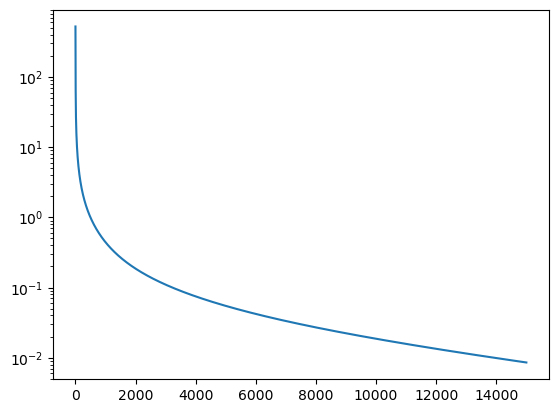

In [4]:
plt.plot(meanloss)
plt.yscale('log')
plt.show()


In [93]:
# theory, pre-conditioning with inverse square root of covariance

evl, evc = np.linalg.eigh(H)

lr = 0.01

T = 10000

muAs = np.zeros((d,T))
sigmaAs = np.zeros((d,d,T))
sigmaAs[:,:,0] = np.eye(d)
meanlossAs = np.zeros((T,))

iH = np.linalg.inv(H)
for iT in np.arange(0,T-1):
    meanlossAs[iT] = 0.5 * np.trace(sigmaAs[:,:,iT] @ H) + 0.5 * (muAs[:,iT] - thetastar).T @ H @ (muAs[:,iT] - thetastar)
    evl, evc = np.linalg.eigh(sigmaAs[:,:,iT])
    
    #isqsigma = evc @ (1/np.sqrt(evl) * evc.T)
    isqsigma = (evc * np.sign(evl)/np.sqrt(np.abs(evl))) @ evc.T
    #sqsigma = evc @ (np.sqrt(evl) * evc.T)
    sqsigma = evc @ (np.sign(evl) * np.sqrt(np.abs(evl)) * evc.T)
    
    muAs[:,iT+1] = muAs[:,iT] - lr * isqsigma @ (muAs[:,iT] - thetastar) 
    sigmaAs[:,:,iT+1] = sigmaAs[:,:,iT] - 2 * lr * sqsigma 
    
meanlossAs[T-1] = 0.5 * np.trace(sigmaAs[:,:,T-1] @ H) + 0.5 * (muAs[:,T-1] - thetastar).T @ H @ (muAs[:,T-1] - thetastar)


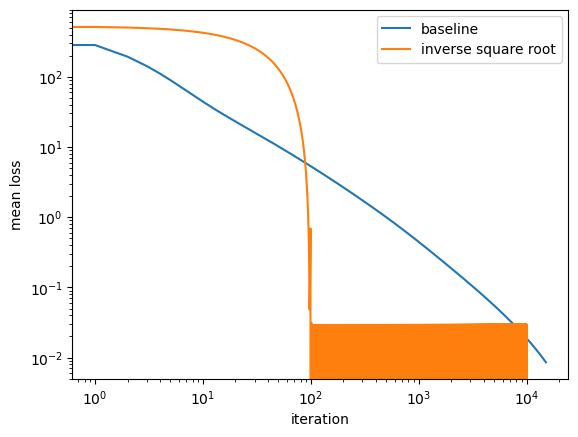

In [94]:
plt.plot(meanloss,label='baseline')
plt.plot(meanlossAs,label='inverse square root')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('iteration')
plt.ylabel('mean loss')
plt.legend()
plt.show()


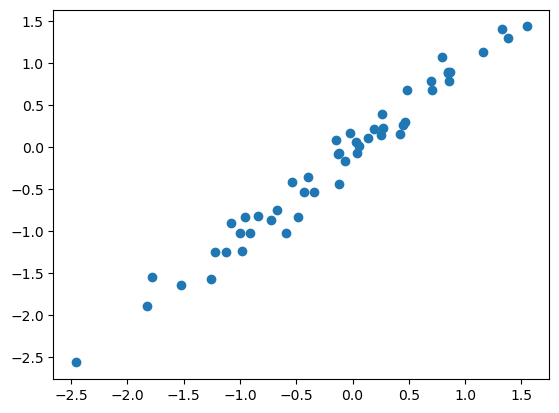

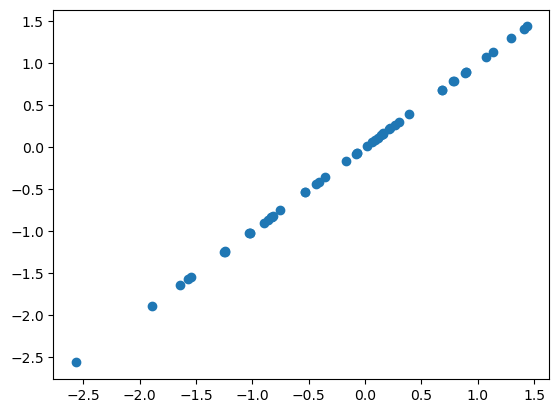

In [95]:

plt.scatter(mu[:,T-1],thetastar)
plt.show()

plt.scatter(muAs[:,T-1],thetastar)
plt.show()


### Finite size

In [219]:

m = 100
# m=50

d = 50
T = 1000


lr = 0.01

#meanw = np.zeros((d,T))
#wstar = np.random.normal(0,1,(d,m)) / np.sqrt(m)
wstar = np.zeros((d,m))

w = np.random.normal(0,1,(d,m)) / np.sqrt(m)
# w, R = np.linalg.qr(np.random.normal(0,1,(d,m)))

w = w + wstar

sqrtsigmaw = np.zeros((d,d,T))
sqrtsigmag = np.zeros((d,d,T))
orthow = np.zeros((d,m,T))
orthog = np.zeros((d,m,T))

loss = np.zeros((T,))

for iT in range(T):
    
    if iT%(T/100) == 0:
        print(iT)

    #meanw[:,iT] = np.mean( w , axis=1 )
    
    sigmaw = (w-wstar) @ (w-wstar).T
    evl, evc = np.linalg.eigh( sigmaw )
    sqrtsigmaw[:,:,iT] = (evc * np.sqrt(evl)) @ evc.T
    isqrtsigmaw = (evc * 1/np.sqrt(evl)) @ evc.T
    orthow[:,:,iT] = isqrtsigmaw @ (w-wstar)
    
    grad = H @ (w-wstar)
    sigmag = grad @ grad.T
    evl, evc = np.linalg.eigh( sigmag )
    sqrtsigmag[:,:,iT] = (evc * np.sqrt(evl)) @ evc.T
    isqrtsigmag = (evc * 1/np.sqrt(evl)) @ evc.T
    orthog[:,:,iT] = isqrtsigmag @ grad
       
    #loss[iT] = 0.5 * np.trace( np.squeeze(covw[:,:,iT]) @ H) + 0.5 * meanw[:,iT].T @ H @ meanw[:,iT]
    loss[iT] = 0.5 * np.trace( sigmaw @ H )

    w = w - lr * np.squeeze(orthog[:,:,iT])
    
    
    



0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


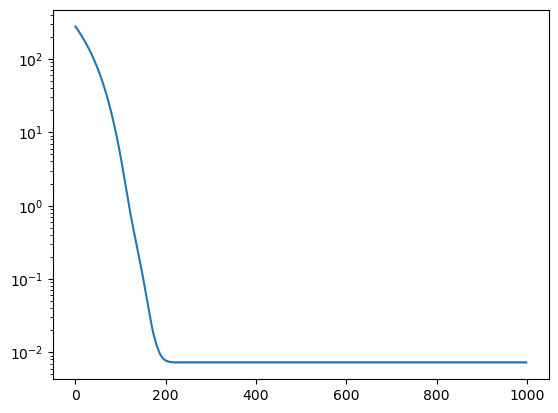

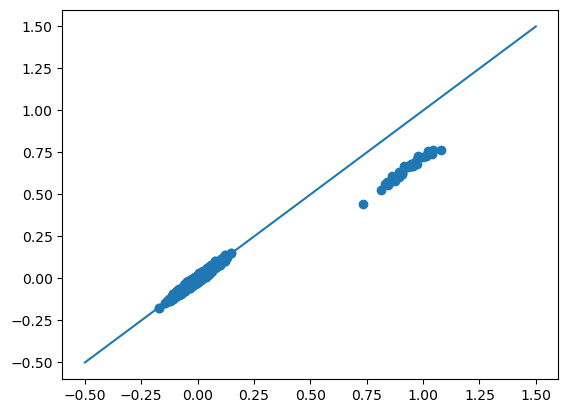

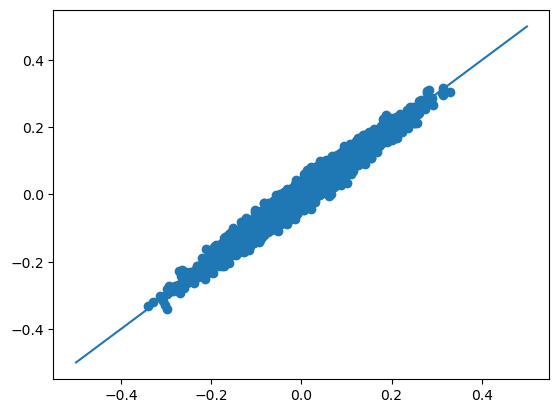

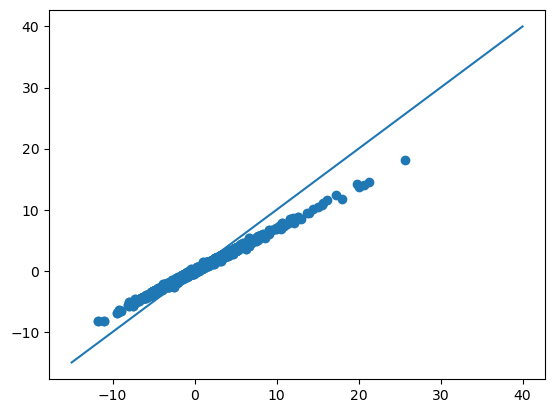

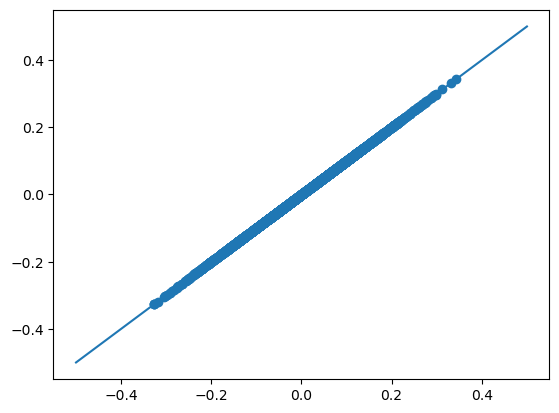

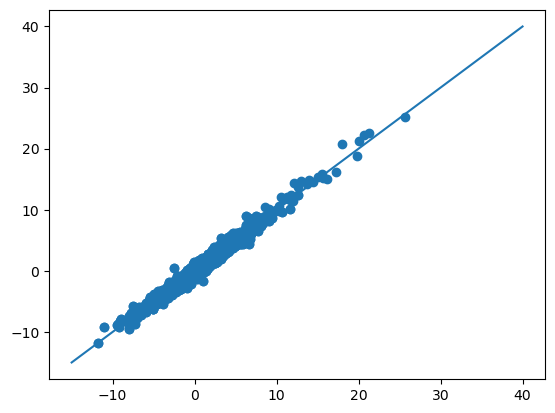

In [222]:

t2 = 30

#plt.plot(np.linalg.norm(meanw,axis=0))
plt.plot(loss)
plt.yscale('log')
plt.show()

plt.scatter(sqrtsigmaw[:,:,0],sqrtsigmaw[:,:,t2])
plt.plot([-0.5, 1.5],[-0.5, 1.5])
plt.show()

plt.scatter(orthow[:,:,0],orthow[:,:,t2])
plt.plot([-0.5, 0.5],[-0.5, 0.5])
plt.show()

plt.scatter(sqrtsigmag[:,:,0],sqrtsigmag[:,:,t2])
plt.plot([-15, 40],[-15, 40])
plt.show()

plt.scatter(orthog[:,:,0],orthog[:,:,t2])
plt.plot([-0.5, 0.5],[-0.5, 0.5])
plt.show()

plt.scatter(sqrtsigmag[:,:,0],H)
plt.plot([-15, 40],[-15, 40])
plt.show()



### varying learning rates

In [147]:

m = 100
d = 50

T = 10000

nlr = 10

lrvec = np.logspace(-3.5,-0.5,nlr)

loss = np.zeros((T,nlr))

for ilr, lr in enumerate(lrvec):

    print(lr)

    wstar = np.random.normal(0,1,(d,m)) / np.sqrt(m)
    w = np.random.normal(0,1,(d,m)) / np.sqrt(m)

    for iT in range(T):

        if iT%(T/100) == 0:
            print(iT)

        sigmaw = (w-wstar) @ (w-wstar).T
        evl, evc = np.linalg.eigh( sigmaw )
        sqrtsigmaw = (evc * np.sqrt(evl)) @ evc.T
        isqrtsigmaw = (evc * 1/np.sqrt(evl)) @ evc.T
        orthow = isqrtsigmaw @ (w-wstar)

        grad = H @ (w-wstar)
        sigmag = grad @ grad.T
        evl, evc = np.linalg.eigh( sigmag )
        sqrtsigmag = (evc * np.sqrt(evl)) @ evc.T
        isqrtsigmag = (evc * 1/np.sqrt(evl)) @ evc.T
        orthog = isqrtsigmag @ grad

        loss[iT,ilr] = 0.5 * np.trace( sigmaw @ H )

        w = w - lr * orthog

    print('\n')





0.00031622776601683794
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


0.0006812920690579615
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
95

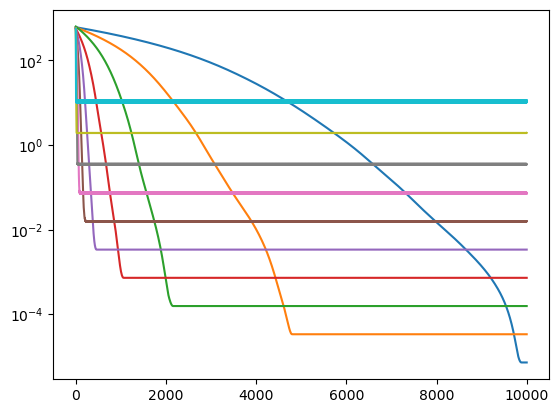

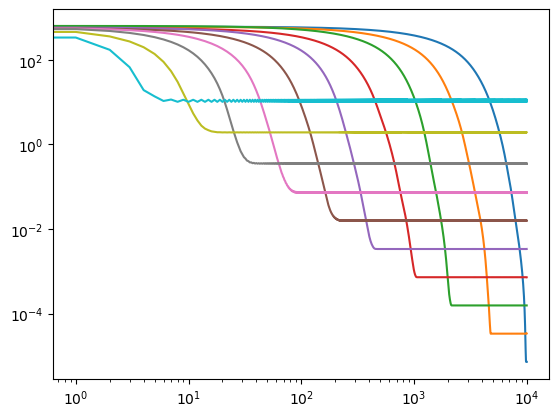

In [148]:

for ilr in range(nlr):
    plt.plot(loss[:,ilr])
    
plt.yscale('log')
#plt.ylim((0.165,0.17))
#plt.xlim((0,100))
plt.show()


for ilr in range(nlr):
    plt.plot(loss[:,ilr])
    
plt.yscale('log')
plt.xscale('log')
plt.show()





In [150]:

print(lrvec)
print('\n')
print(1/lrvec)


[0.00031623 0.00068129 0.0014678  0.00316228 0.00681292 0.01467799
 0.03162278 0.06812921 0.14677993 0.31622777]


[3162.27766017 1467.79926762  681.29206906  316.22776602  146.77992676
   68.12920691   31.6227766    14.67799268    6.81292069    3.16227766]


### decaying learning rate

In [238]:
m = 100
d = 50
T = 1000

beta = 0.93

#eta = 0.03

#meanw = np.zeros((d,T))
#wstar = np.random.normal(0,1,(d,m)) / np.sqrt(m)
wstar = np.zeros((d,m))

w = np.random.normal(0,1,(d,m)) / np.sqrt(m)

sqrtsigmaw = np.zeros((d,d,T))
sqrtsigmag = np.zeros((d,d,T))
orthow = np.zeros((d,m,T))
orthog = np.zeros((d,m,T))

loss = np.zeros((T,))

for iT in range(T):
    
    if iT%(T/100) == 0:
        print(iT)

    #meanw[:,iT] = np.mean( w , axis=1 )
    
    sigmaw = (w-wstar) @ (w-wstar).T
    evl, evc = np.linalg.eigh( sigmaw )
    sqrtsigmaw[:,:,iT] = (evc * np.sqrt(evl)) @ evc.T
    isqrtsigmaw = (evc * 1/np.sqrt(evl)) @ evc.T
    orthow[:,:,iT] = isqrtsigmaw @ (w-wstar)
    
    grad = H @ (w-wstar)
    sigmag = grad @ grad.T
    evl, evc = np.linalg.eigh( sigmag )
    sqrtsigmag[:,:,iT] = (evc * np.sqrt(evl)) @ evc.T
    isqrtsigmag = (evc * 1/np.sqrt(evl)) @ evc.T
    orthog[:,:,iT] = isqrtsigmag @ grad
       
    #loss[iT] = 0.5 * np.trace( np.squeeze(covw[:,:,iT]) @ H) + 0.5 * meanw[:,iT].T @ H @ meanw[:,iT]
    loss[iT] = 0.5 * np.trace( sigmaw @ H )

    w = w - beta**(iT+1) * np.squeeze(orthog[:,:,iT])
    #w = w - eta * np.exp( - eta * iT ) * np.squeeze(orthog[:,:,iT])


    
    


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


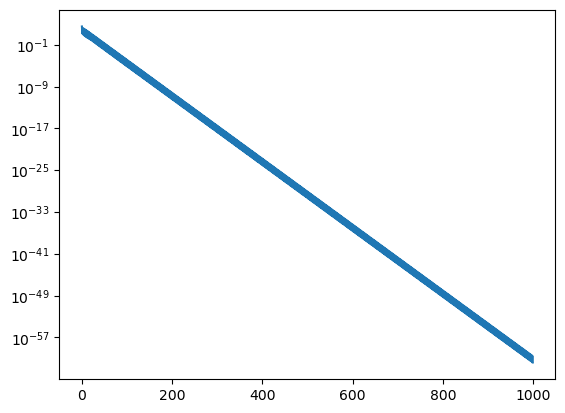

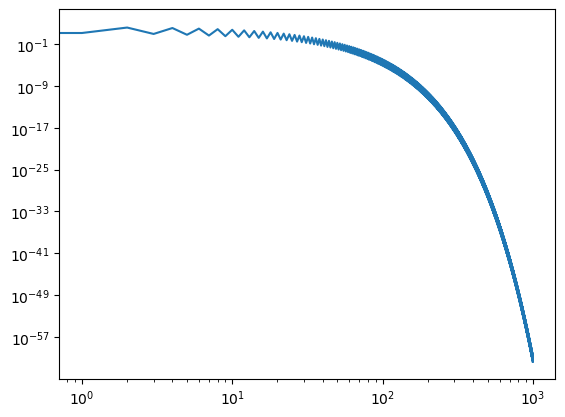

1.65484744387682e-62


In [239]:

plt.plot(loss)
plt.yscale('log')
plt.show()

plt.plot(loss)
plt.xscale('log')
plt.yscale('log')
plt.show()

print(loss[T-1])


### minimal model

In [100]:

T = 1000
nlr = 10

lrvec = np.logspace(-3,-1,nlr)

x = np.ones((T,nlr))

for ilr, lr in enumerate(lrvec):
    
    print(ilr)

    for iT in range(T-1):
        x[iT+1,ilr] = x[iT,ilr] - lr * np.sign(x[iT,ilr]) * np.sqrt(np.abs(x[iT,ilr]))



0
1
2
3
4
5
6
7
8
9


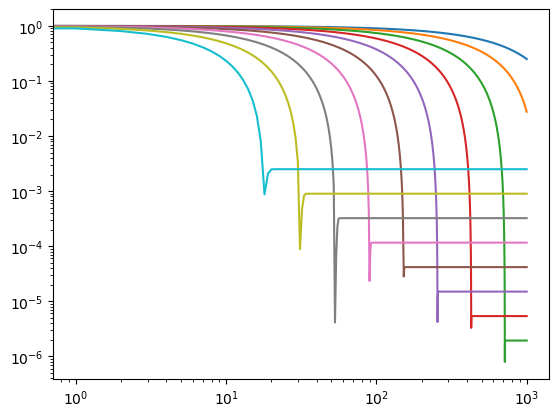

In [105]:

for ilr in range(nlr):
    plt.plot(np.abs(x[:,ilr]))
plt.xscale('log')
plt.yscale('log')
plt.show()
